In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [7]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male': 0, 'female':1})
titanic.dropna(subset=feature_names, inplace=True) 

In [8]:
X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [9]:
print('Tamanho de X_train', X_train.shape)
print('Tamanho de X_test', X_test.shape)
print('Tamanho de y_train', y_train.shape)
print('Tamanho de y_test', y_test.shape)

Tamanho de X_train (535, 4)
Tamanho de X_test (179, 4)
Tamanho de y_train (535,)
Tamanho de y_test (179,)


In [11]:
model = keras.models.Sequential() #Cria uma rede neural sequencial - feed foward 
model.add(keras.layers.Dense(4, activation='relu', input_shape=X_train[0].shape)) #primeira hidden layer
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid')) #outputlayer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [13]:
batch_size = 32 #X_train 535/32 = 16.71 então são 17 batches de 
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 3.2091 - accuracy: 0.5589 - val_loss: 1.9828 - val_accuracy: 0.6034
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 2.6048 - accuracy: 0.5794 - val_loss: 1.6148 - val_accuracy: 0.6034
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 2.5010 - accuracy: 0.5533 - val_loss: 1.3817 - val_accuracy: 0.6034
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 2.0987 - accuracy: 0.5701 - val_loss: 1.2401 - val_accuracy: 0.5475
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 2.0632 - accuracy: 0.5364 - val_loss: 1.1399 - val_accuracy: 0.5531
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 1.7015 - accuracy: 0.5832 - val_loss: 1.0509 - val_accuracy: 0.5642
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 1.7318 - accuracy: 0.4953 - val_loss: 0.9684 - val_accuracy: 0.5587
Epoch 8/100


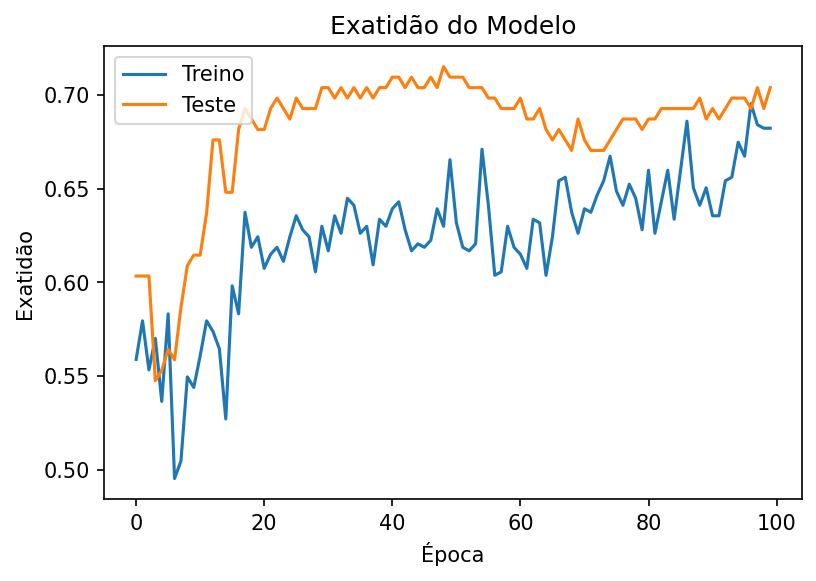

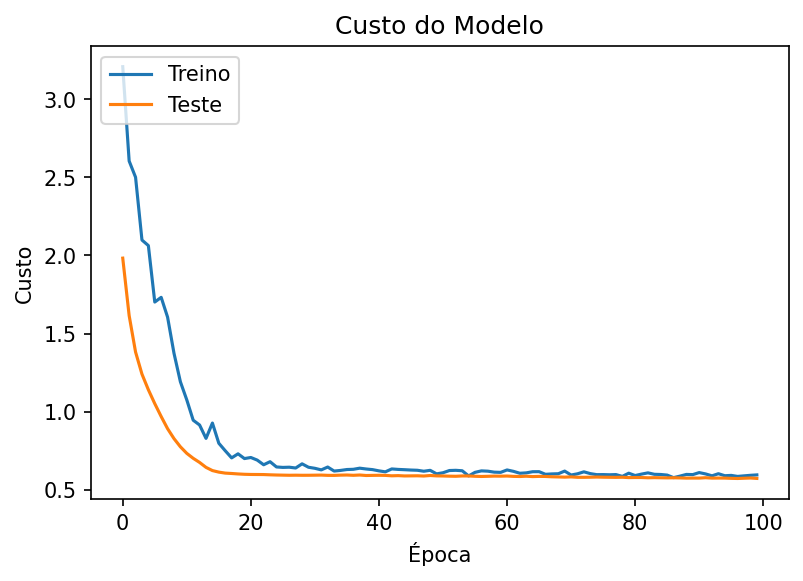

In [17]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

#Plot acurácia de treino e validação 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

print()
#Plot custo de treino e validação 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

In [18]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.7039


[0.572031557559967, 0.7039105892181396]

In [19]:
#Fazer previsões com o modelo
(model.predict(X_test)> 0.5).astype('int32')

6/6 [==============================] - 0s 3ms/step


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    